In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
import matplotlib.lines as mlines

# Daily Max Versus Mean WBGT

In [2]:
# Load labor capacity data
ds_max = xr.open_dataset('../data/processed/GFDL/labor_max_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [3]:
# Population data
ds_pop = xr.open_dataset('../data/processed/GFDL/population_regrid_esm2m.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

In [4]:
# Load labor capacity data
ds_mean = xr.open_dataset('../data/processed/GFDL/labor_mean_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'})

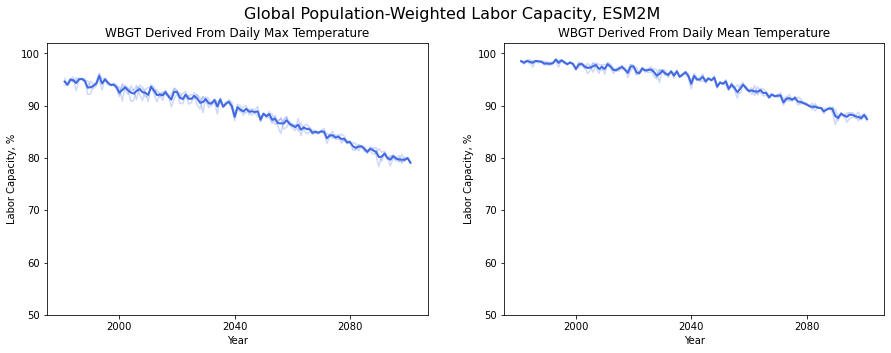

In [8]:
fig,axs = plt.subplots(figsize=(15,5),ncols=2)

lf.capacity(ds_max.isel(time=slice(30,None))['capacity'],ds_pop,'Global','GFDL',axs[0])
axs[0].set_ylim([50,102]);
axs[0].set_title('WBGT Derived From Daily Max Temperature')

lf.capacity(ds_mean.isel(time=slice(30,None))['capacity'],ds_pop,'Global','GFDL',axs[1])
axs[1].set_ylim([50,102]);
axs[1].set_title('WBGT Derived From Daily Mean Temperature')

fig.suptitle('Global Population-Weighted Labor Capacity, ESM2M',fontsize=16);
fig.savefig('esm2m_max_mean_global_capacity.png')

# Plots for Regions: WBGT Max

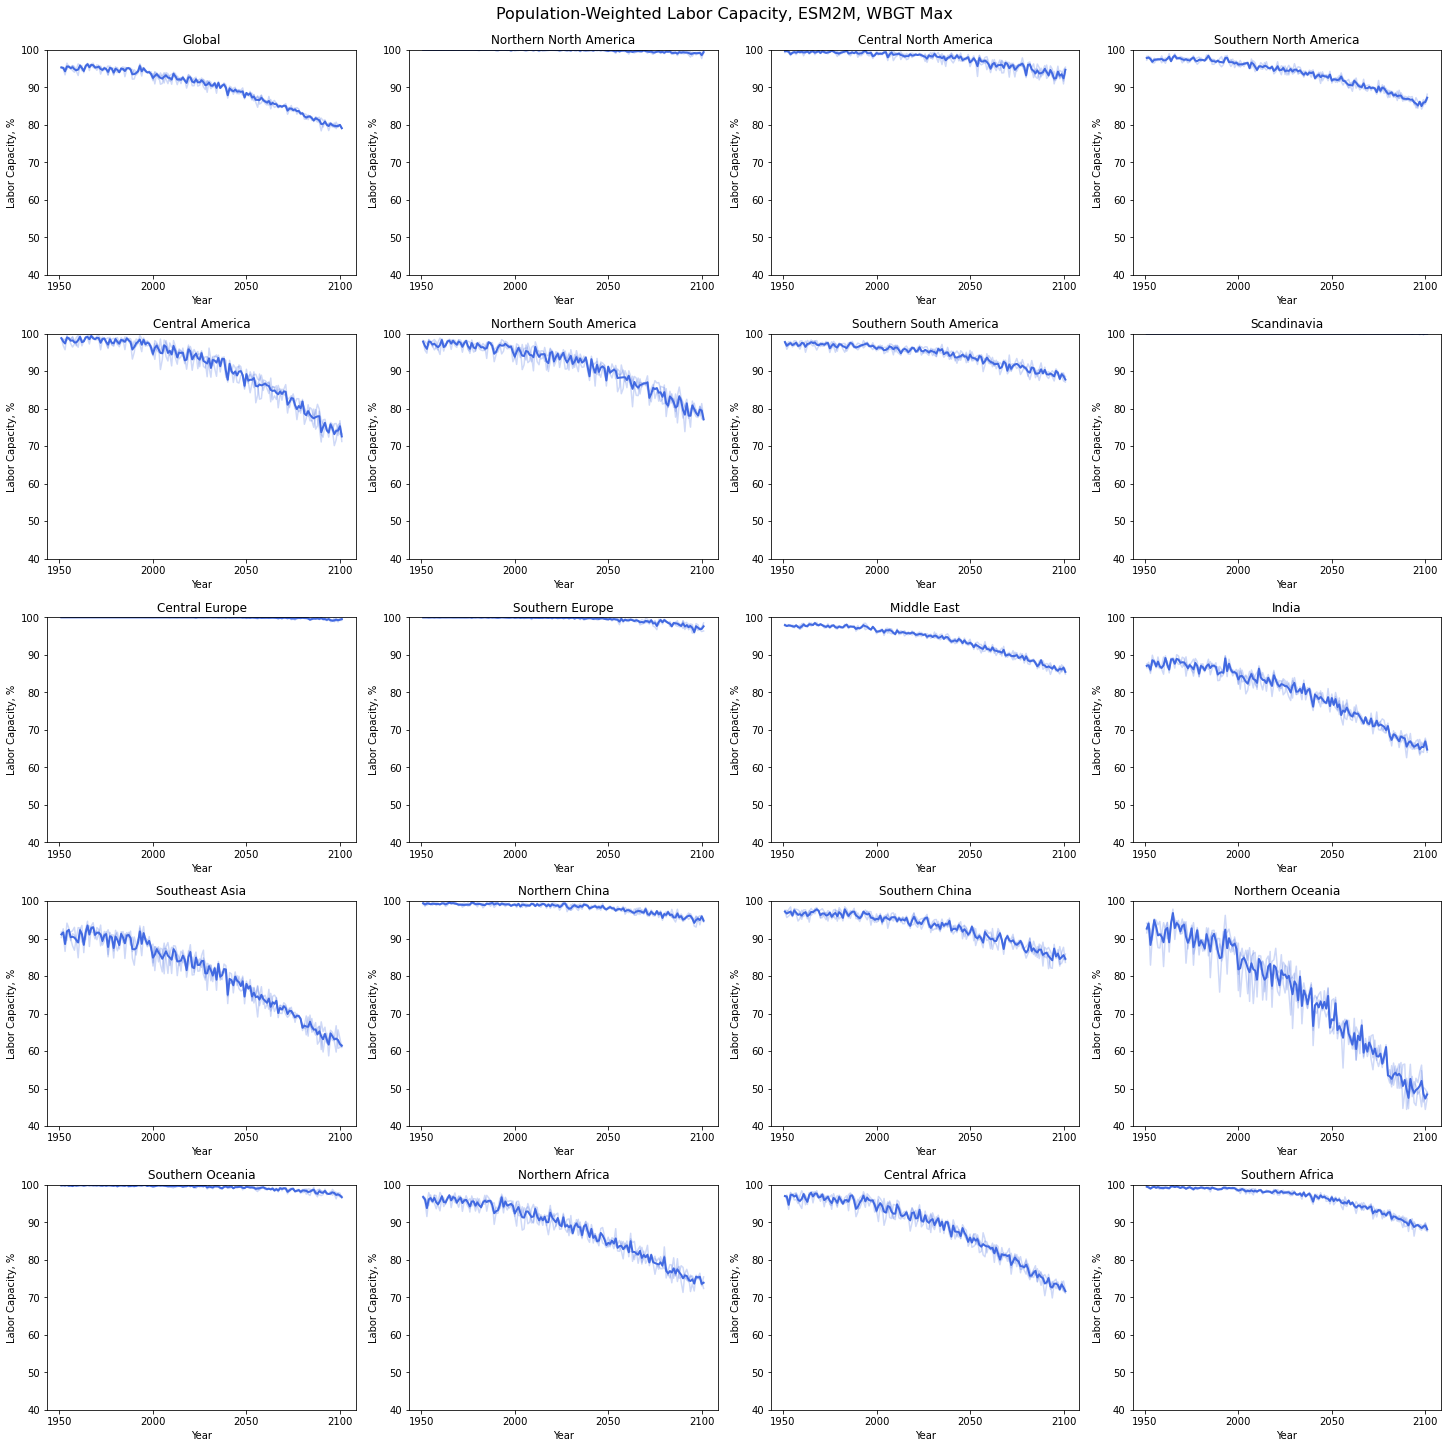

In [46]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    lf.capacity(ds_max['capacity'],ds_pop,region,'GFDL',ax)
    ax.set_ylim([40,100])
    
fig.suptitle('Population-Weighted Labor Capacity, ESM2M, WBGT Max',fontsize=16);
fig.savefig('max_regional_capacities.png')

# Plots for Regions, WBGT Mean

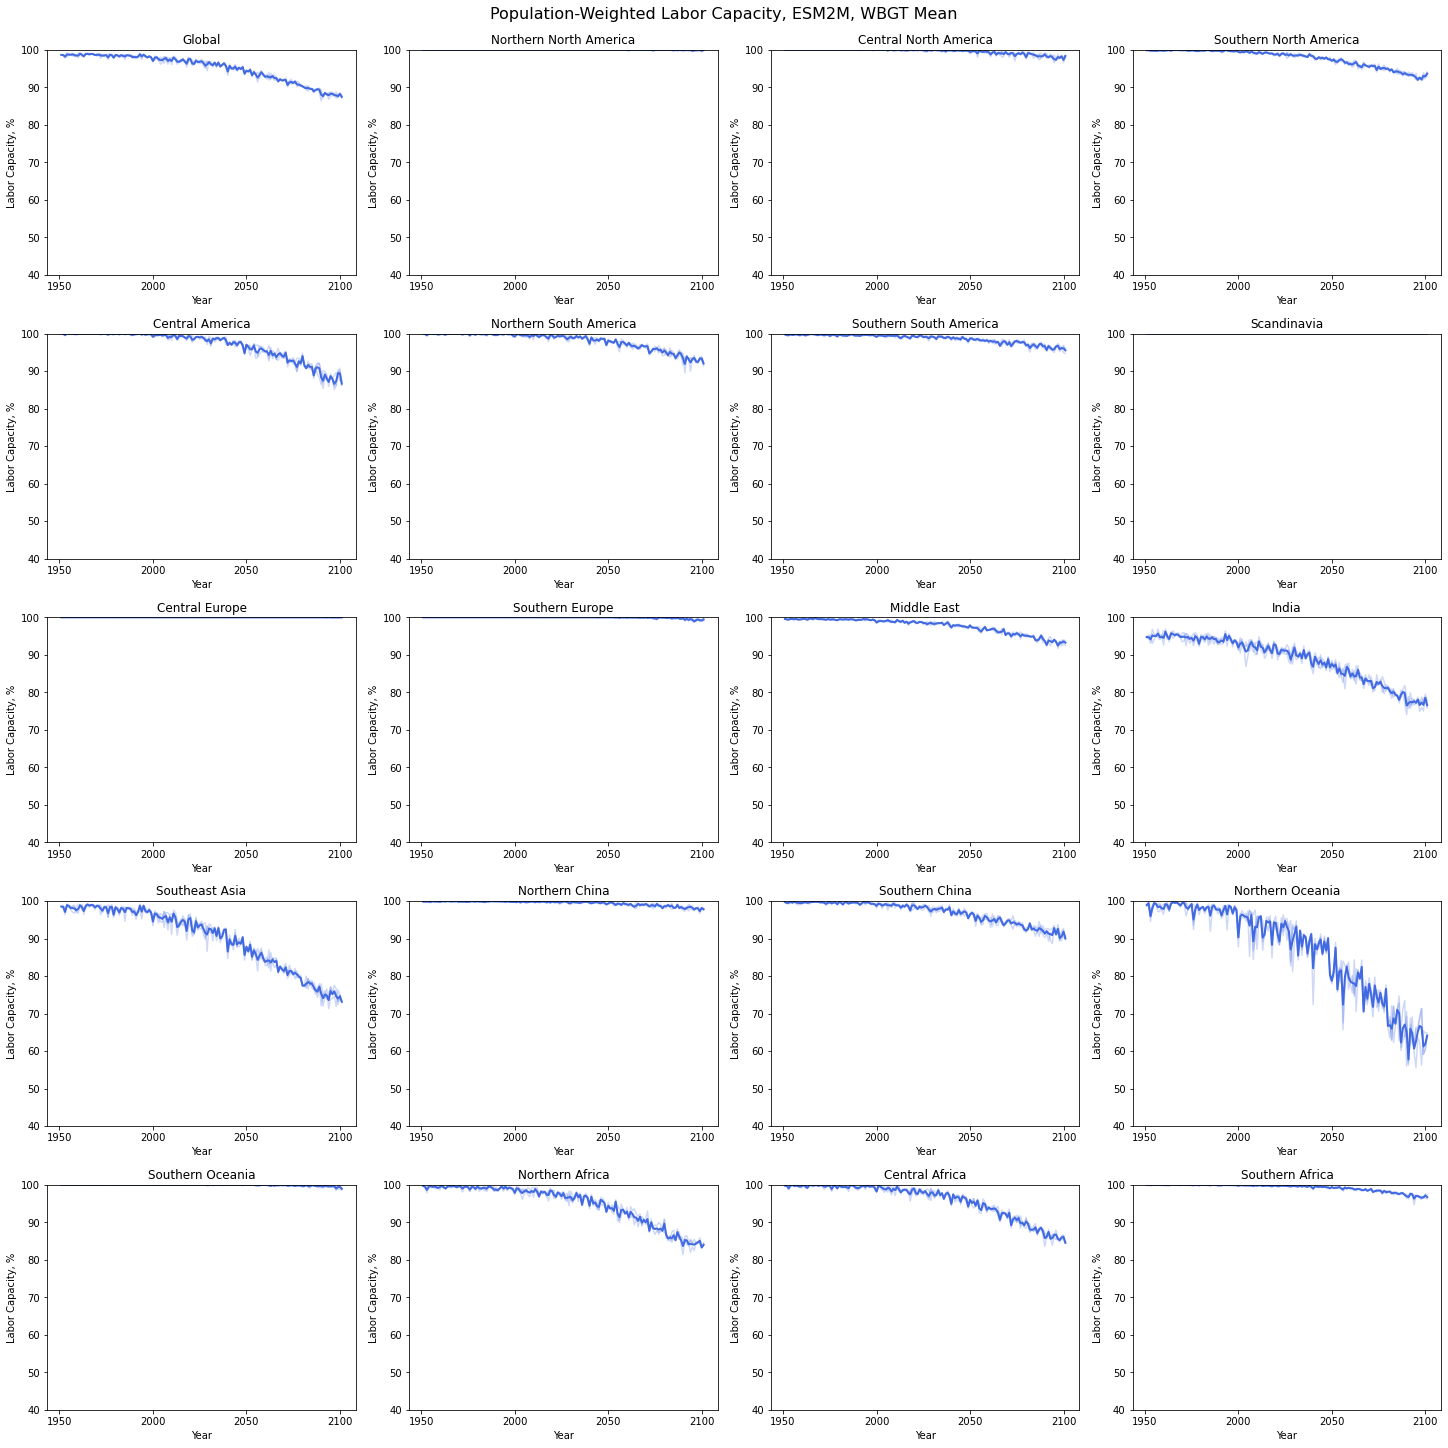

In [47]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    lf.capacity(ds_mean['capacity'],ds_pop,region,'GFDL',ax)
    ax.set_ylim([40,100])
    
fig.suptitle('Population-Weighted Labor Capacity, ESM2M, WBGT Mean',fontsize=16);
fig.savefig('mean_regional_capacities.png')

# Plots for Regions, Max + Mean

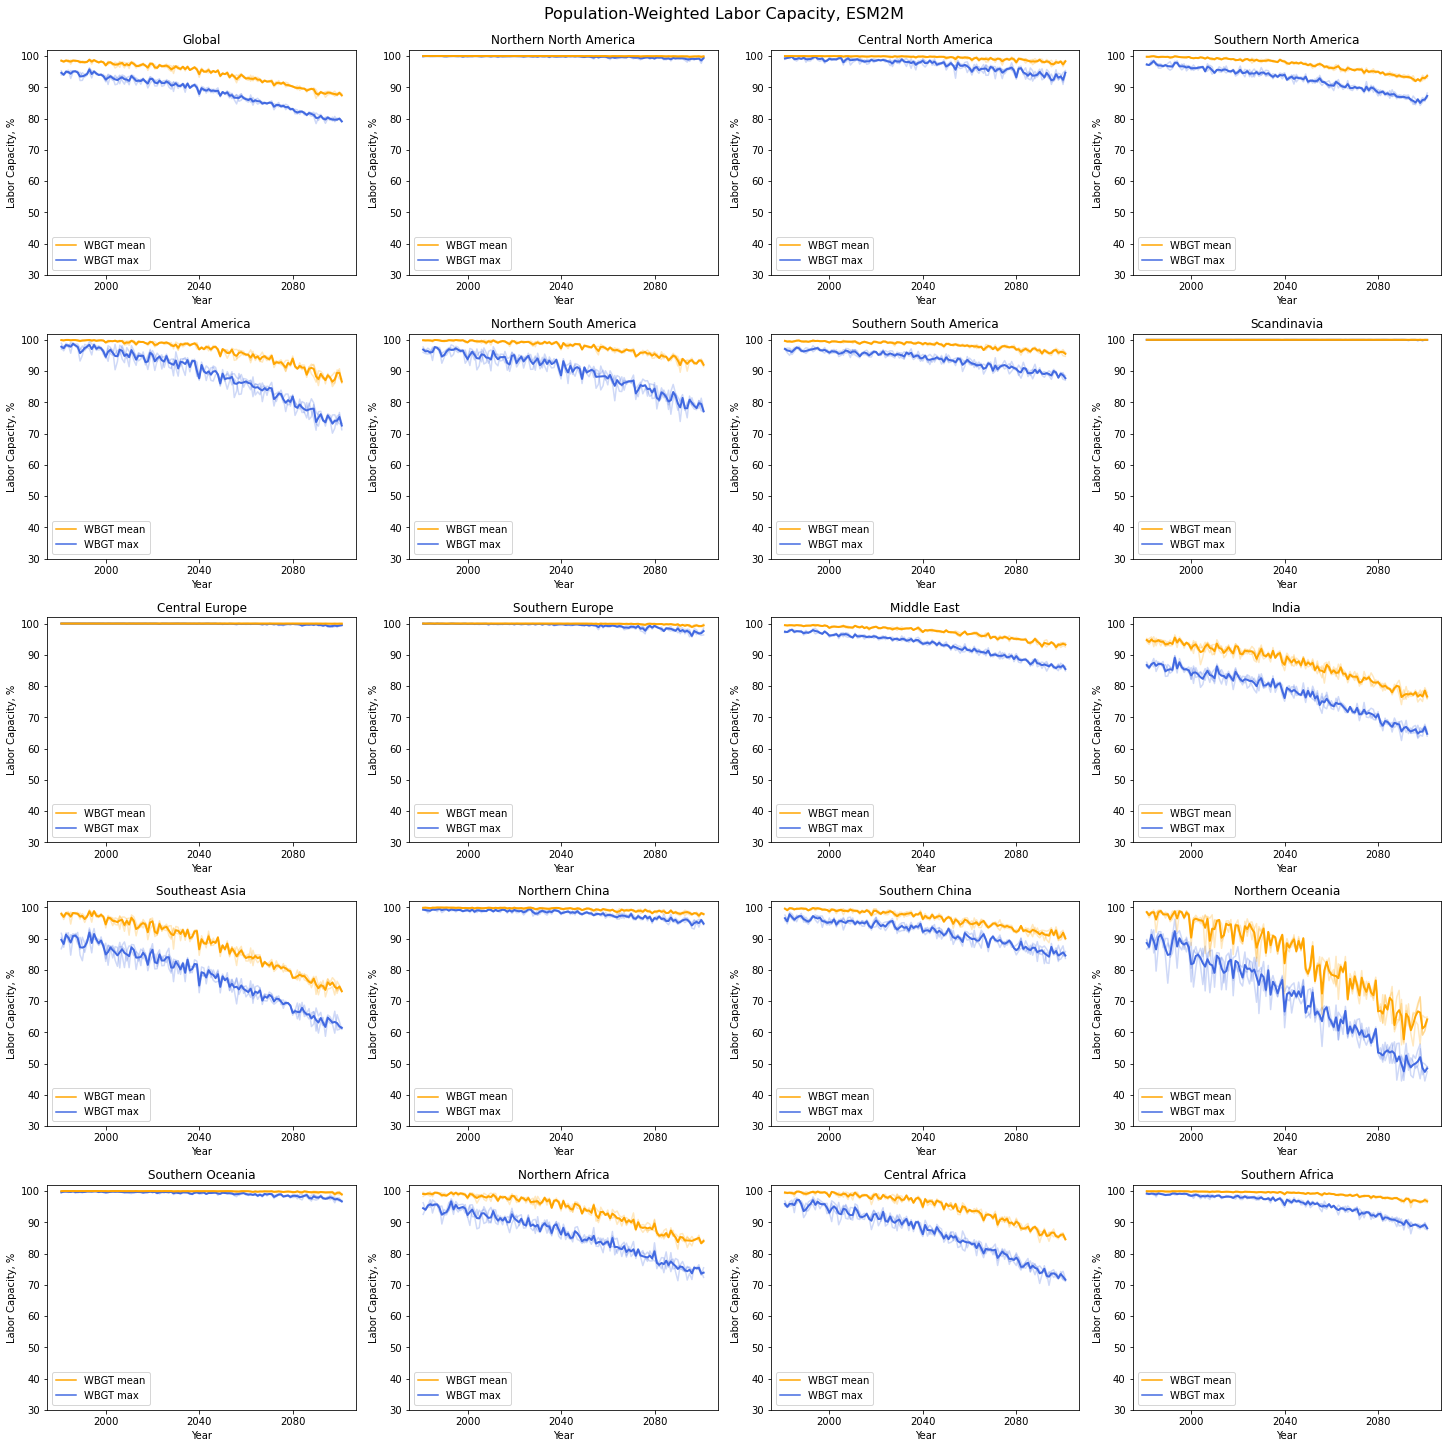

In [10]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    lf.capacity(ds_max.isel(time=slice(30,None))['capacity'],ds_pop,region,'GFDL',ax)
    lf.capacity(ds_mean.isel(time=slice(30,None))['capacity'],ds_pop,region,'GFDL',ax,'orange')
    ax.set_ylim([30,102])
    blue_line = mlines.Line2D([], [], color='royalblue', label='WBGT max')
    orange_line = mlines.Line2D([], [], color='orange', label='WBGT mean')
    ax.legend(handles=[orange_line,blue_line],loc='lower left');
    
fig.suptitle('Population-Weighted Labor Capacity, ESM2M',fontsize=16);
fig.savefig('esm2m_max_mean_regional_capacities.png')

# Spatial Maps - WBGT Max

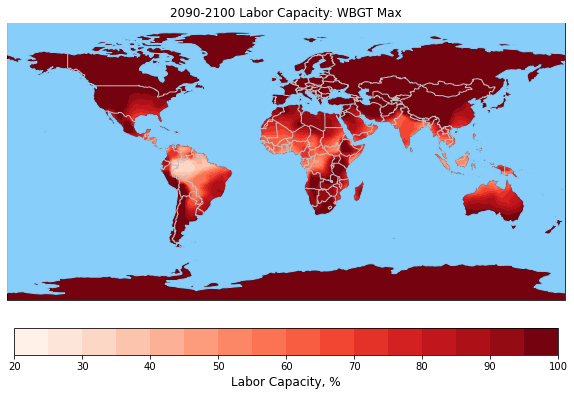

In [72]:
# Ensemble average labor capacity
capacity_2090 = ds_max.isel(time=slice(-10,None)).mean(['time','ensemble'])
lf.contour_plot(capacity_2090['capacity'],'2090-2100 Labor Capacity: WBGT Max',levels=np.linspace(20,100,17))
plt.savefig('spatial_capacity_max_2090.png')

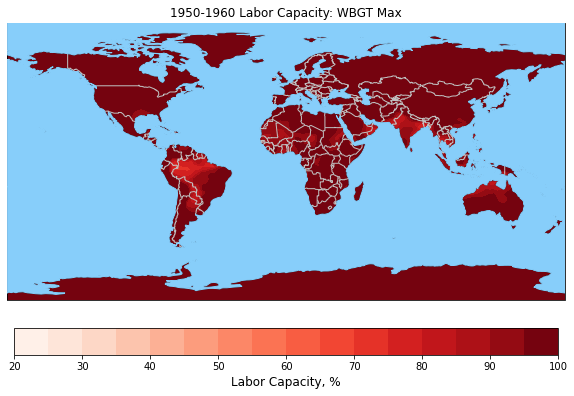

In [71]:
# Ensemble average labor capacity
capacity_1950 = ds_max.isel(time=slice(0,10)).mean(['time','ensemble'])
lf.contour_plot(capacity_1950['capacity'],'1950-1960 Labor Capacity: WBGT Max',levels=np.linspace(20,100,17))
plt.savefig('spatial_capacity_max_1950.png')

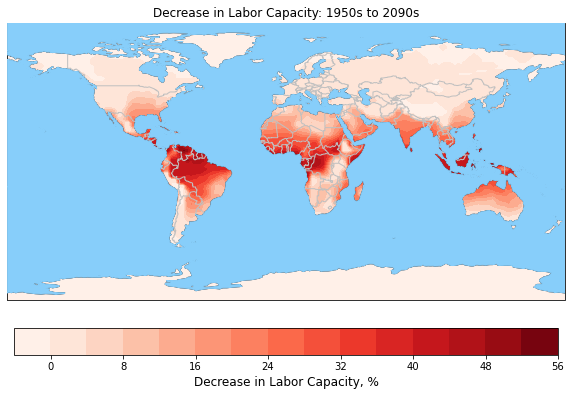

In [74]:
# Ensemble average labor capacity
capacity_change = capacity_1950 - capacity_2090
lf.contour_plot(capacity_change['capacity'],'Decrease in Labor Capacity: 1950s to 2090s',levels=15,label='Decrease in Labor Capacity, %')
plt.savefig('spatial_capacity_max_change.png')

# Spatial Maps - WBGT Mean

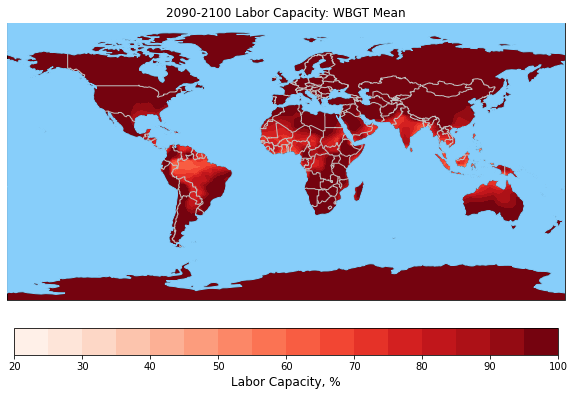

In [75]:
# Ensemble average labor capacity
capacity_2090 = ds_mean.isel(time=slice(-10,None)).mean(['time','ensemble'])
lf.contour_plot(capacity_2090['capacity'],'2090-2100 Labor Capacity: WBGT Mean',levels=np.linspace(20,100,17))
plt.savefig('spatial_capacity_mean_2090.png')

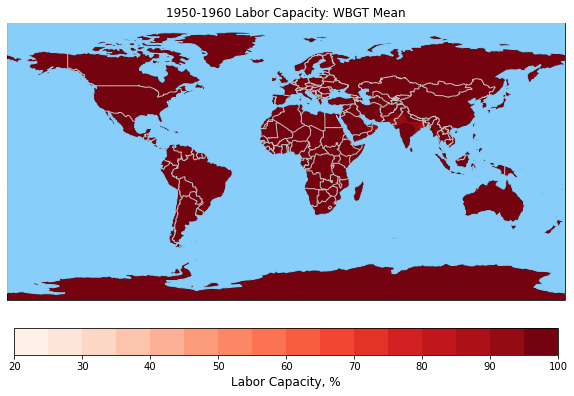

In [76]:
# Ensemble average labor capacity
capacity_1950 = ds_mean.isel(time=slice(0,10)).mean(['time','ensemble'])
lf.contour_plot(capacity_1950['capacity'],'1950-1960 Labor Capacity: WBGT Mean',levels=np.linspace(20,100,17))
plt.savefig('spatial_capacity_mean_1950.png')

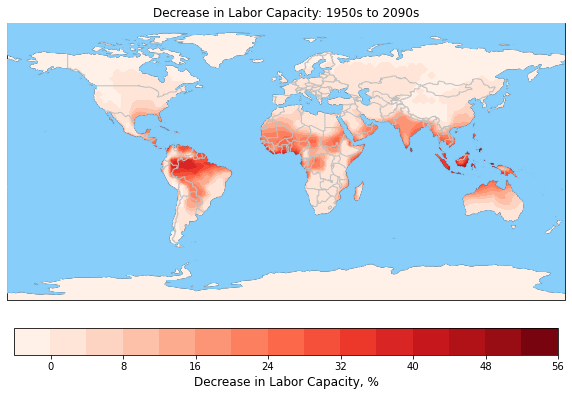

In [82]:
# Ensemble average labor capacity
capacity_change = capacity_1950 - capacity_2090
lf.contour_plot(capacity_change['capacity'],'Decrease in Labor Capacity: 1950s to 2090s',levels=np.linspace(-4,56,16),label='Decrease in Labor Capacity, %')
plt.savefig('spatial_capacity_mean_change.png')